In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Tarea 1: Juntar los csv en solo uno

In [5]:
data_path = 'Sales_Data/'

In [6]:
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]
print(csv_files)

['Sales_September_2019.csv', 'Sales_February_2019.csv', 'Sales_December_2019.csv', 'Sales_April_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_January_2019.csv', 'Sales_October_2019.csv', 'Sales_August_2019.csv', 'Sales_March_2019.csv', 'Sales_November_2019.csv', 'Sales_May_2019.csv']


In [7]:
df = pd.DataFrame()
for i in csv_files:
    temp = pd.read_csv(data_path+"/"+i)
    df = pd.concat([df, temp])
    
df.to_csv('merge.csv', index = False)

In [8]:
all_data = pd.read_csv('merge.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


## Tarea 2: Nueva columna meses

In [11]:
all_data['Month'] = all_data['Order Date'].str.extract('(\d+)/')
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9
...,...,...,...,...,...,...,...
95,248243,USB-C Charging Cable,1,11.95,09/04/19 10:49,"522 12th St, San Francisco, CA 94016",9
96,248244,Lightning Charging Cable,1,14.95,09/21/19 16:01,"57 Willow St, Dallas, TX 75001",9
97,248245,Wired Headphones,1,11.99,09/15/19 10:40,"969 Maple St, Dallas, TX 75001",9
98,248246,Wired Headphones,1,11.99,09/11/19 20:13,"727 Center St, Los Angeles, CA 90001",9


#### ValueError: cannot convert float NaN to integer

In [10]:
all_data.dropna(subset=['Month'], inplace=True)


## Data Exploration!

**Question 1: What was the best month for sales? How much was earned that month?**

In [12]:
# Creamos una nueva columna sales
all_data['Sales'] = all_data['Quantity Ordered'].astype('int32') * all_data['Price Each'].astype('float32')

month_sales = all_data.groupby(['Month']).sum(numeric_only=True)

print(month_sales)


              Sales
Month              
1      1.822257e+06
2      2.202022e+06
3      2.807100e+06
4      3.390670e+06
5      3.152607e+06
6      2.577802e+06
7      2.647776e+06
8      2.244468e+06
9      2.097560e+06
10     3.736727e+06
11     3.199603e+06
12     4.613443e+06


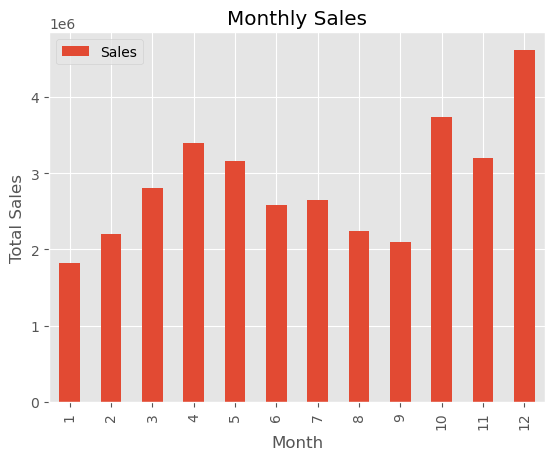

In [13]:
# Grafica
plt.style.use('ggplot')
month_sales.plot(kind='bar')  
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

**Question 2: What city sold the most product?**

In [14]:
address_list = all_data['Purchase Address'].str.split(',')
city_list = [addr[1] for addr in address_list]
all_data['City'] = city_list
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.360000,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.900000,Austin
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.950000,Los Angeles
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.990005,Seattle
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.950000,Atlanta
...,...,...,...,...,...,...,...,...,...
186845,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101",5,99.989998,Seattle
186846,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016",5,11.990000,San Francisco
186847,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215",5,5.980000,Boston
186848,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101",5,11.950000,Seattle


In [15]:
q2 = all_data.groupby(['City']).agg({'Sales': 'sum'})

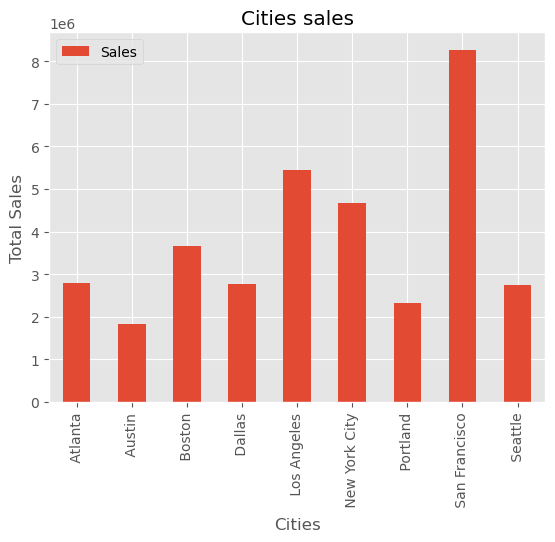

In [16]:
q2.plot(kind='bar')  
plt.title('Cities sales')
plt.xlabel('Cities')
plt.ylabel('Total Sales')
plt.show()

**Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?**

In [18]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.360000,Los Angeles,14,44
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.900000,Austin,10,19
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.950000,Los Angeles,17,48
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.990005,Seattle,7,52
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.950000,Atlanta,19,3


In [22]:
all_data['Count Hours'] = 1
count_hours = all_data.groupby(['Hour']).count()['Count Hours']
count_hours.head()

Hour
0    3910
1    2350
2    1243
3     831
4     854
Name: Count Hours, dtype: int64

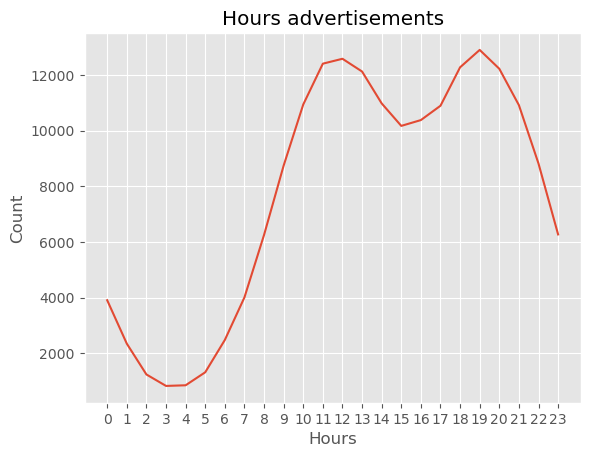

In [25]:
count_hours.plot(kind='line')  
plt.title('Hours advertisements')
plt.xlabel('Hours')
plt.ylabel('Count')

x_values = count_hours.index.tolist()

plt.xticks(range(len(x_values)), x_values)

plt.show()

**Question 4: What products are most often sold together?**

In [37]:
print("no se")

no se
